In [6]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [8]:
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon = np.copy(fb.variables['nav_lon'])
nav_lat = np.copy(fb.variables['nav_lat'])
bathy = np.copy(fb.variables['Bathymetry'])
fb.close()
thw = np.loadtxt(
    '/ocean/gsgarbi/MEOPAR/tools/bathymetry/thalweg_working.txt',
    delimiter=" ", dtype=int)

print (thw)
thw_lat = nav_lat[thw[:,0], thw[:,1]]
thw_lon = nav_lon[thw[:,0], thw[:,1]]

[[406   2]
 [406   3]
 [406   4]
 ..., 
 [896  43]
 [896  42]
 [897  42]]


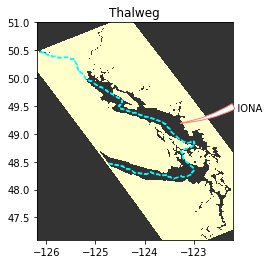

In [40]:
# cmap = plt.get_cmap('Oranges')
# cmap.set_bad('k')

Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)
plt.clf()
start = dt.datetime.now()


mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
tmask=np.copy(mesh.variables['tmask'])
mesh.close()
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon=np.copy(fb.variables['nav_lon'])
nav_lat=np.copy(fb.variables['nav_lat'])
fb.close()





fig, axs2 = plt.subplots(1,1,figsize=(5,4))
mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap = 'YlOrRd')
axs2.set_xlim(xl)
axs2.set_ylim(yl)
axs2.patch.set_alpha(0.8)
viz_tools.set_aspect(axs2,coords='map')





el = Ellipse((2, -1), 0.5, 0.5)
axs2.annotate(
        "   IONA",
        xy=(Iona[0], Iona[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom', color = 'black',
        arrowprops=dict(arrowstyle="wedge,tail_width=0.6",
                                  fc=(1,1,1), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

fb=nc.Dataset('/ocean/gsgarbi/revised_notebooks/ncfiles/bathymetry_201702.nc')

B = np.copy(fb.variables ['Bathymetry'])
LON = np.copy(fb.variables ['nav_lon'])
LAT = np.copy(fb.variables ['nav_lat'])
fb.close()

axs2.plot(thw_lon, thw_lat, '--', ms = '0.8', color = "aqua")

axs2.set_facecolor('black')


axs2.set_title("Thalweg")


fig.savefig("/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/thalweg.png")